In [ ]:
!pip install tmm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.4/284.4 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tmm: filename=tmm-0.1.8-py3-none-any.whl size=284835 sha256=98e1182103561a244c893dd006b94c9ce6c22a11abf2dbce1523d202614cce37
  Stored in directory: /root/.cache/pip/wheels/5f/68/5e/1e0512c1868f9289f8217f5add2bbf35080821de68390dadb6
Successfully built tmm


In [ ]:
from __future__ import division, print_function, absolute_import

from tmm import (coh_tmm, unpolarized_RT, ellips,
                       position_resolved, find_in_structure_with_inf)

from numpy import pi, linspace, inf, array
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

[inf, 110.71428571428571, 258.3333333333333, 110.71428571428571, 387.5, 110.71428571428571, 258.3333333333333, 110.71428571428571, inf]


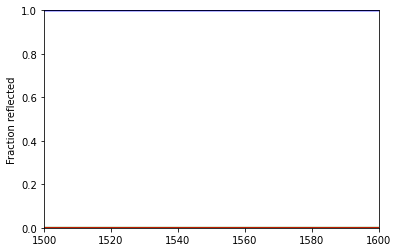

In [ ]:
degree = pi/180
# list of layer thicknesses in nm
#d_list = [inf,  100,,10000,10000,10000,10000,10000, inf]
# list of refractive indices
#n_list = [1, 5.03 + 0.34j, 3.5 + 0.0j, 1]
#n_list = [1 ,  3.5 + 0j, 1]
n_list = [1.0, 3.5, 1.5,3.5,1.0,3.5,1.5,3.5,1.0]

# wavelength in nm
#lam_vac = 1550
lam = 1550.0
#lambda_list = linspace(1500,1800,50)
d_list = [inf, lam/(4.0*n_list[1]),lam/(4.0*n_list[2]),lam/(4.0*n_list[3]),lam/(4.0*n_list[4].real),lam/(4.0*n_list[5]),lam/(4.0*n_list[6]),lam/(4.0*n_list[7]),inf]
## angle
theta = 0*degree
lambda_list = linspace(1500,1600,100)
# list of angles to plot
#theta_list = linspace(0*degree, 89*degree, num=300)
# initialize lists of y-values to plot
Rp = []
Tp = []
Ap = []
for lam_vac in lambda_list:
#for theta in theta_list:
    Rp.append(coh_tmm('s', n_list, d_list, theta, lam_vac)['R'])
    Tp.append(coh_tmm('s',n_list,d_list,theta,lam_vac)['T'])
    A = 1.0 - ((coh_tmm('s', n_list, d_list, theta, lam_vac)['R'])+(coh_tmm('s', n_list, d_list, theta, lam_vac)['T']))
    Ap.append(A)
plt.figure()
#plt.plot(theta_list/degree, Rp, 'blue')
plt.plot(lambda_list, Rp, 'blue')
#plt.plot(theta_list/degree, Tp, 'green')
plt.plot(lambda_list, Tp, 'green')
#plt.plot(theta_list/degree, Ap, 'red')
plt.plot(lambda_list, Ap, 'red')
#plt.xlabel('lambda)')
plt.ylabel('Fraction reflected')
plt.xlim(1500, 1600)
plt.ylim(0, 1)
print(d_list)